## 4,1  配列の要素の書き換え

In [9]:
# 問題　幸運の数

def digit_sum(n):
    nums = []
    while n > 10:
        # すでにループをi回繰り返したとして、この時点でnumsは１の位~iの位までの和
        nums.append(n % 10)
        n = n //10
    nums.append(n)
    return sum(nums)

def lucky_array(n):
    a = [False for i in range(n)]
    for i in range(1, n):
        if i%7==0 or digit_sum(i)%7==0:
            a[i] = True
        # この時点で、aは1以上i以下の全ての幸運な整数番目の要素のみTrueの配列
    return a

In [70]:
# 問題 エラトステネスの篩

import math


def select_index(a):
    return [i for i in range(len(a)) if a[i]]

def prime_array(n):
    a = [False] * 2 + [True for _ in range(n-2)]
    
    for i in range(2, math.floor(math.sqrt(n))+1, 1):
        if a[i]:
            for j in range(2, (n-1)//i+1, 1):
                a[i*j] = False
    return select_index(a)

## 4.2 二次元配列

In [92]:
# 問題　表計算

def rsum(a, r):
    return sum(a[r])

def vsum(a, r):
    v = [a[i][r] for i in range(len(a))]
    return sum(v)

def extend_sum(a):
    for i in range(len(a)):
        a[i].append(rsum(a, i))
    b = [vsum(a, j) for j in range(len(a[0]))]
    a.append(b)
    return a

## 4.3 有限ライフゲーム

In [3]:
def make_field(height, width, living):
    field = [[False for _ in range(width)] for _ in range(height)]
    for i in range(len(living)):
        field[living[i][0]][living[i][1]] = True
    return field

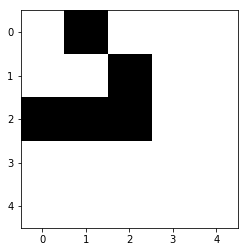

In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot(array2d):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(array2d, interpolation="nearest", cmap="Greys") 
    fig.show() # fig.savefig("plot.pdf")

a = make_field(5, 5, [[0,1], [1,2], [2,0], [2,1], [2,2]])
plot(a)

In [5]:
def inside(field, r, c):
    is_inside = False
    if 0 <= r < len(field) and 0<= c < len(field[0]):
        is_inside = True
    return is_inside

def is_living_cell(field, r, c):
    is_living = False
    if inside(field, r, c) and field[r][c]:
        is_living = True
    return is_living

def count(field, r, c):
    num_living = 0
    for i in range(-1, 2, 1):
        for j in range(-1, 2, 1):
            if (i!=0 or j!=0) and is_living_cell(field, r+i, c+j):
                num_living += 1
    return num_living

In [36]:
# 問題 次の状態

def next_field(a):
    b = []
    for i in range(len(a)):
        r = []
        for j in range(len(a[0])):
            c = False
            if is_living_cell(a, i, j):
                if count(a, i, j)==2 or count(a, i, j)==3:
                    c = True
            else:
                if count(a, i, j)==3:
                    c = True
            r.append(c)
        b.append(r)
    return b

<IPython.core.display.Javascript object>


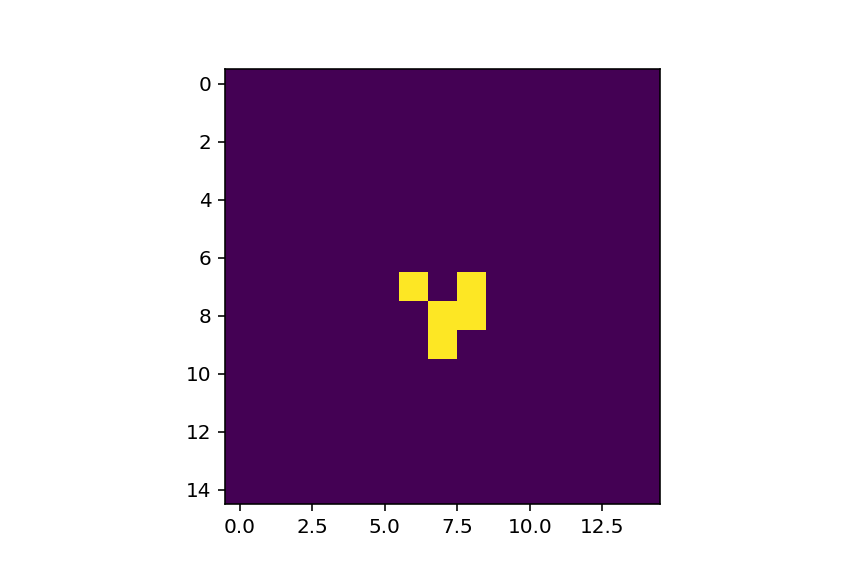

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg

def show_animation(initial_field,step):
    a = []
    fig = plt.figure()
    field = initial_field
    for i in range(step): 
        a.append([plt.imshow(field)]) 
        field = next_field(field)
    anim = animation.ArtistAnimation(fig, a, interval=100) 
    plt.show()
    return anim

glider = [[0,1],[1,2],[2,0],[2,1],[2,2]]
show_animation(make_field(15,15,glider),50)
# plt.show()

<IPython.core.display.Javascript object>


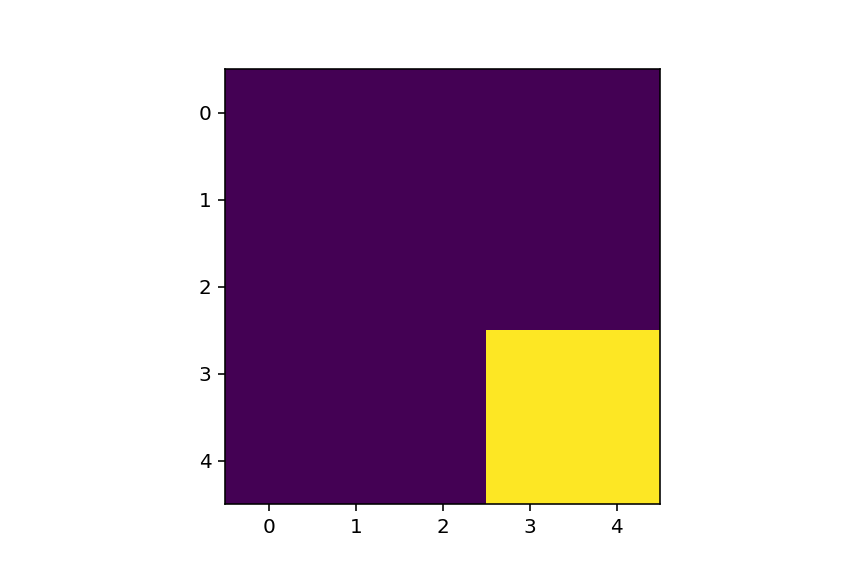

In [106]:
show_animation(a, 50)